# **Evento Smart Shopping**

Fuente: https://www.kaggle.com/datasets/zeesolver/fashion

Identificación del problema: "X" tienda americana realiza una temporada de ofertas durante el año, en donde sus clientes pueden obtener sus productos a un menor precio. Los clientes pueden usar ambos métodos de pago como lo son tarjetas de crédito o débito y pago en efectivo. Tomando en cuenta que es posible que algunos productos puedan obtener mínimos montos de compra. La tienda valora mucho los comentarios de los clientes, y recibe una calificación de acuerdo a la experiencia de compra del cliente.

Con la situación presentada podemos plantearnos algunas preguntas que podrían resolverse mediante el análisis y la ciencia de datos. Las preguntas obtenidas son las siguientes:

1. ¿Qué método de pago es el más utilizado por los clientes?
2. ¿Qué producto es el más consumido?
3. ¿Cuál es el promedio de la satisfacción del cliente después de consumir en la tienda?
4. ¿Cuál es el promedio en valor de los artículos vendidos?
5. ¿En qué día hubo más ventas?
6. ¿Si se pudiera relacionar la calificación del cliente con el método de pago, cuál sería el método de pago preferido?

## **1. PROCESAMIENTO DE DATOS**

## **Importación de librerías primarias**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## **Importación de dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSetsAny/Fashion_Retail_Sales.csv')
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


## **Análisis general del dataset**

In [4]:
#Obtenemos dimensiones del dataset
df.shape

(3400, 6)

In [5]:
#Obtenemos el nombre de las columnas contenidas en el dataset
df.columns

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')

Analizando el nombre de las columnas, podemos observar que tenemos datos de compras como es el ID del cliente, el producto adquirido, la cantidad que se pagó por el producto, la calificación del cliente, y el método de pago.

In [6]:
# Obtenemos el tipo de dato de nuestras columnas para realizar análisis
df.dtypes

Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

In [7]:
#Verificamos si tenemos valores nulos en nuestras columnas
df.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

## **Limpieza del Dataset**

In [8]:
#Se limpian filas en donde todos sus valores sean nulos
df_drop = df.dropna(how='all')
df_drop

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,NaN,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


In [9]:
#No tenemos ninguna fila con todos sus valores nulos
df_drop.shape

(3400, 6)

In [10]:
# Llenamos los valores nulos de la columna Purchase Amount (USD) con ceros, pues es un dato númerico
df_drop['Purchase Amount (USD)']=df_drop['Purchase Amount (USD)'].fillna(0)
#df_drop = df_drop.dropna(subset=['Purchase Amount (USD)'])

In [11]:
# Llenamos los valores nulos de la columna PReview Rating con ceros, pues es un dato númerico
#Despues de análisis estadistico se decide borrar los registros con calificación NaN, porque produce sesgos
#Que esten en 0 puede afectar negativamente a la estadística de la tienda, cuando podríamos pensar que simplemente no emitieron su voto
#Al ser una variable que determina el desempeño de la experiencia, si es imoprtante
#df_drop['Review Rating']=df_drop['Review Rating'].fillna(0)
df_drop = df_drop.dropna(subset=['Review Rating'])

In [12]:
# Volvemos a verificar nuestros datos nulos en todo el dataset
df_drop.isna().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [13]:
#Verificamos el tipo de dato de nuestras columnas
df_drop.dtypes

Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

In [14]:
# Por convencion, decidimos cambiar la estructura del nombre de nuestras columnas
column_name_mapping = {
    'Customer Reference ID' : 'customer_reference_id',
    'Item Purchased': 'item_purchased',
    'Purchase Amount (USD)' : 'purchase_amount',
    'Date Purchase' : 'date_purchase',
    'Review Rating' : 'review_rating',
    'Payment Method': 'payment_method'
}

In [15]:
#Asignamos los nuevos nombres de nuestras columnas al dataset
df = df_drop
df = df_drop.rename(columns=column_name_mapping)

In [16]:
df.shape

(3076, 6)

In [17]:
# Se comprueba que los nombres de las columnas han sido cambiados
df.head()

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card


In [18]:
#Verificamos nuevamente el tipo de dato de nuestras columnas, para ver si es necesario hacer algun casteo
df['purchase_amount'].astype(np.float64)
df.dtypes

customer_reference_id      int64
item_purchased            object
purchase_amount          float64
date_purchase             object
review_rating            float64
payment_method            object
dtype: object

Hasta este punto nuestro dataset ha sido analizado y se ha realizado la limpieza de datos nulos. También se ha cambiado el nombre de las variables, y se ha realizado casteo de tipo de datos de las columnas.

# **2. ANÁLISIS DE DATOS**

### **PRIMERA VARIABLE (purchase_amount) - ANALISIS**

In [19]:
#Obtenemos estimados de locacion
print('Estimados de locacion')
print('purchase_amount')
print('Media:',df['purchase_amount'].mean())
print('Mediana:',df['purchase_amount'].median())
print('Media truncada:', stats.trim_mean(df['purchase_amount'], 0.1))
print('Desv. estandar:', df['purchase_amount'].std())

Estimados de locacion
purchase_amount
Media: 120.96228868660599
Mediana: 86.0
Media truncada: 84.60926076360683
Desv. estandar: 354.9204878895212


Con los datos obtenidos de nuestro primer analisis de estimados de locación podemos observar que tenemos una media elevada comparando con la mediana y la media truncada, aquí podemos hacer la hipótesis de que es muy probable que en nuestro dataset existan datos atípicos que estén elevando la media.

In [20]:
# Obtenemos estimados de variabilidad
print('Estimados de variabilidad')
print('purchase_amount')
print('Valor minimo: ', df['purchase_amount'].min())
print('Percentil 10:',df['purchase_amount'].quantile(0.10))
print('Percentil 25:',df['purchase_amount'].quantile(0.25))
print('Percentil 50:',df['purchase_amount'].quantile(0.50))
print('Percentil 75:',df['purchase_amount'].quantile(0.75))
print('Percentil 90:',df['purchase_amount'].quantile(0.90))
print('Valor maximo:',df['purchase_amount'].max())

Estimados de variabilidad
purchase_amount
Valor minimo:  0.0
Percentil 10: 0.0
Percentil 25: 24.0
Percentil 50: 86.0
Percentil 75: 145.0
Percentil 90: 180.0
Valor maximo: 4932.0


Con los resultados obtenidos del análisis de los estimados de variabilidad podemos deducir que efectivamente tenemos datos elevados, debido a que es mucha la diferencia entre el percentil 90 y el valor máximo. Es probable que sean estos datos los que aumenten la media calculada anteriormente.

<Axes: xlabel='purchase_amount'>

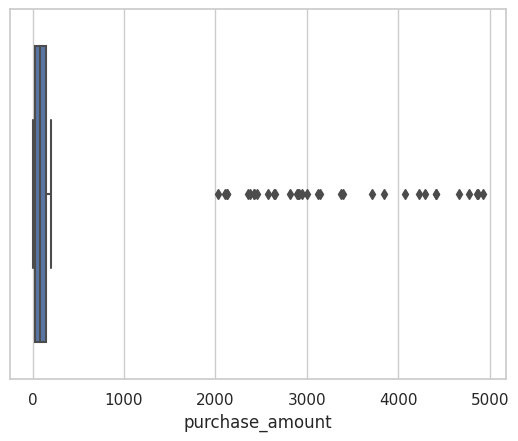

In [21]:
# Realizamos una boxplot de nuestros datos para tener una mejor visualización de la probable existencia
# de valores atípicos.
sns.set(style="whitegrid")
sns.boxplot(x=df['purchase_amount'])

Nuestra hipótesis resulta cierta, en la gráfica podemos visualizar muchos datos atípicos fuera de la gráfica de caja, como anteriormente se mencionó son estos datos los que producen una media elevada.

In [22]:
# Realizamos el filtrado de nuestros datos atípicos
iqr_purchase = df['purchase_amount'].quantile(0.75)- df['purchase_amount'].quantile(0.25)
filtro_infPurchase = df['purchase_amount'] > df['purchase_amount'].quantile(0.25) - (1.5 * iqr_purchase)
filtro_supPurchase = df['purchase_amount'] < df['purchase_amount'].quantile(0.75) + (1.5 * iqr_purchase)

df_purchaseFil = df[filtro_infPurchase & filtro_supPurchase]
df_purchaseFil

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method
43,3992,Backpack,101.0,2022-12-13,1.3,Credit Card
44,4105,Dress,164.0,2022-10-20,3.2,Credit Card
45,4119,Boots,21.0,2023-04-03,3.9,Cash
46,3957,Camisole,147.0,2022-11-04,4.7,Cash
47,3994,Loafers,0.0,2023-05-16,3.9,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,0.0,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


<Axes: xlabel='purchase_amount'>

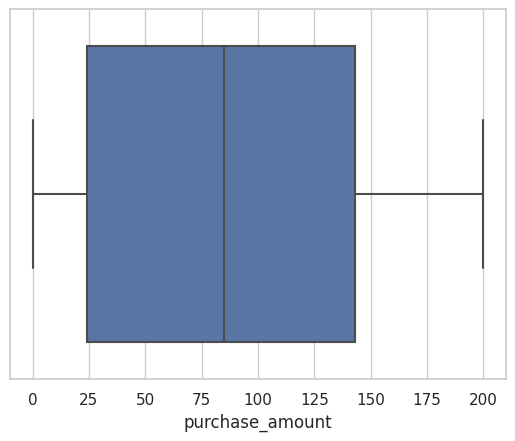

In [23]:
# Volvemos a graficar nuestro dataset, esta vez con los datos filtrados
sns.set(style="whitegrid")
sns.boxplot(x=df_purchaseFil['purchase_amount'])

Obtenemos una gráfica mejor distribuida sin datos atípicos, y podemos observar mejor la concentración de nuestros datos.

In [24]:
# Realizamos comparación de las medidas de locación de nuestros datos antes del filtrado
# y después de realizar el filtrado
print('Estimados de locacion')
print('purchase_amount')
print('Media:',df['purchase_amount'].mean())
print('Mediana:',df['purchase_amount'].median())
print('Media truncada:', stats.trim_mean(df['purchase_amount'], 0.1))
print('Desv. estandar:', df['purchase_amount'].std())
print('Comparacion')
print('Datos filtrados por IQR')
print('Media:',df_purchaseFil['purchase_amount'].mean())
print('Mediana:',df_purchaseFil['purchase_amount'].median())
print('Media truncada:', stats.trim_mean(df_purchaseFil['purchase_amount'], 0.1))
print('Desv. estandar:', df_purchaseFil['purchase_amount'].std())

Estimados de locacion
purchase_amount
Media: 120.96228868660599
Mediana: 86.0
Media truncada: 84.60926076360683
Desv. estandar: 354.9204878895212
Comparacion
Datos filtrados por IQR
Media: 85.54043392504931
Mediana: 85.0
Media truncada: 83.31059983566146
Desv. estandar: 65.01935948926558


Analizando los datos después del filtrado podemos observar que las medidas de locación se ven mejor y más parecidas entre ellas.

In [25]:
#Tabla de frecuencias
purchase = df['purchase_amount']
purchase.max() - purchase.min()

4932.0

In [26]:
#Realizamos los intervalos de nuestra tabla de frecuencia de 70
intervalos = pd.cut(purchase, 70)

In [27]:
df['purchase_amount'].groupby(intervalos).count()

purchase_amount
(-4.932, 70.457]        1368
(70.457, 140.914]        879
(140.914, 211.371]       795
(211.371, 281.829]         0
(281.829, 352.286]         0
                        ... 
(4579.714, 4650.171]       0
(4650.171, 4720.629]       1
(4720.629, 4791.086]       1
(4791.086, 4861.543]       1
(4861.543, 4932.0]         2
Name: purchase_amount, Length: 70, dtype: int64

Observando los datos obtenidos de nuestra tabla de frecuencia podemos deducir que la mayoria de nuestros datos están concentrados en precios menores a 211 USD.

<ipython-input-28-a3ee586a67fe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['purchase_amount'], kde=False, norm_hist=False, bins=100)


<Axes: xlabel='purchase_amount'>

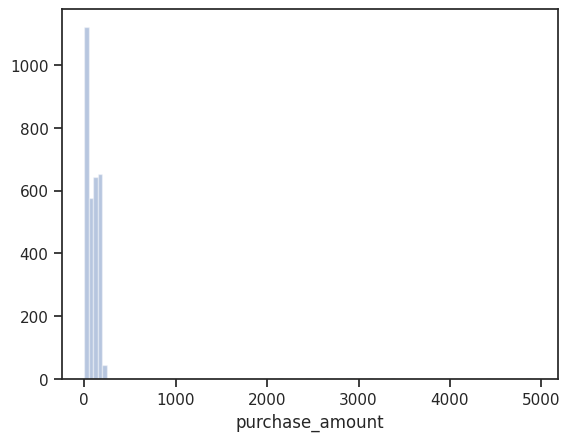

In [28]:
#Graficamos nuetra columna del dataset en una grafica de barras
sns.set(style="ticks")
sns.distplot(df['purchase_amount'], kde=False, norm_hist=False, bins=100)

También en la grafica de barras es posible observar que los datos están concentrados más en precios bajos. Existen productos con precios muy elevados pero debido a que solo son minimos, no se pueden observar gráficamente.

In [29]:
# Obtenemos curtosis y asímetria de nuestra columna
print('Curtosis: ', kurtosis(df['purchase_amount']))
print('Asimetría: ', skew(df['purchase_amount']))

Curtosis:  107.40600470070349
Asimetría:  9.968688517479057


Los resultados nos demuestran una curtosis positiva, es decir una grafica elevada. Así mismo, tenemos una asimetría positiva que indica que nuestra gráfica tiene una inclinación hacia la derecha.

### **SEGUNDA VARIABLE (review_rating) - ANALISIS**

In [30]:
#Obtenemos estimados de locacion
print('Estimados de locacion')
print('review_rating')
print('Media:',df['review_rating'].mean())
print('Mediana:',df['review_rating'].median())
print('Media truncada:', stats.trim_mean(df['review_rating'], 0.1))
print('Desv. estandar:', df['review_rating'].std())

Estimados de locacion
review_rating
Media: 2.999057217165149
Mediana: 3.0
Media truncada: 3.0013809910641753
Desv. estandar: 1.1565054266748527


Realizando el análisis de nuestros resultados, podemos decir que nuestra mediana está más cercana a la media truncada. Entonces con ello podemos realizar la hipótesis de que tenemos valores atípicos bajos al promedio.

La variable que estamos analizando, es acerca de la puntuación que el cliente da de acuerdo a su satisfacción con el producto o la experiencia de la compra, dentro de este contexto y haciendo la analogía con los datos de la media, se puede asumir que es probable que haya más califaciaciones debajo de la media, por ende calificaciones bajas.

In [31]:
#Obtenemos estimados de variabilidad
print('Estimados de variabilidad')
print('review_rating')
print('Valor minimo: ', df['review_rating'].min())
print('Percentil 10:',df['review_rating'].quantile(0.10))
print('Percentil 25:',df['review_rating'].quantile(0.25))
print('Percentil 50:',df['review_rating'].quantile(0.50))
print('Percentil 75:',df['review_rating'].quantile(0.75))
print('Percentil 90:',df['review_rating'].quantile(0.90))
print('Valor maximo:',df['review_rating'].max())

Estimados de variabilidad
review_rating
Valor minimo:  1.0
Percentil 10: 1.4
Percentil 25: 2.0
Percentil 50: 3.0
Percentil 75: 4.0
Percentil 90: 4.6
Valor maximo: 5.0


De acuerdo con los resultados obtenidos de los estimados de variabilidad, podemos mencionar que es complicado conocer la distribución de los datos, sin embargo por la diferencia entre los percentiles, podemos decir que la población de calificaciones más representativa se encuentra en un valor de 3.9

<Axes: xlabel='review_rating'>

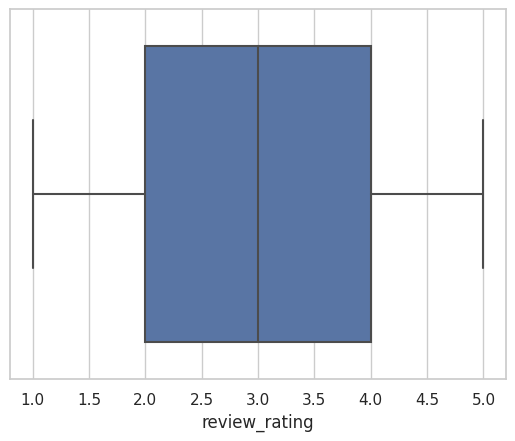

In [32]:
# Realizamos una boxplot de nuestros datos para tener una mejor visualización de la probable existencia
# de valores atípicos.
sns.set(style="whitegrid")
sns.boxplot(x=df['review_rating'])

Tenemos un dataset muy preciso que contiene la mayoria de sus datos dentro de la media, esto es lo que se puede observar como resultado de la grafica de caja.

In [33]:
# Realizamos el filtrado de nuestros datos atípicos
iqr_review = df['review_rating'].quantile(0.75)- df['review_rating'].quantile(0.25)
filtro_inf_review = df['review_rating'] > df['review_rating'].quantile(0.25) - (1.5 * iqr_review)
filtro_sup_review = df['review_rating'] < df['review_rating'].quantile(0.75) + (1.5 * iqr_review)

df_reviewFil = df[filtro_inf_review & filtro_sup_review]
df_reviewFil

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,0.0,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


<Axes: xlabel='review_rating'>

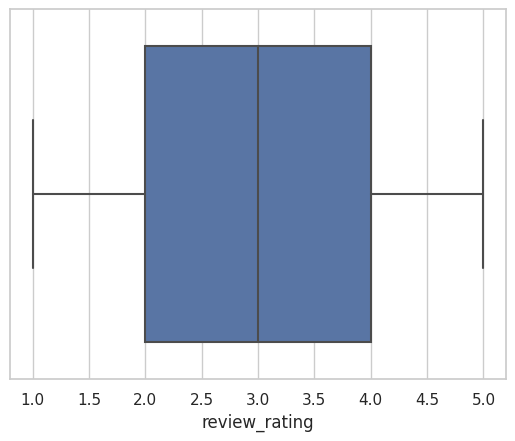

In [34]:
# Volvemos a graficar nuestro dataset, esta vez con los datos filtrados
sns.set(style="whitegrid")
sns.boxplot(x=df_reviewFil['review_rating'])

In [35]:
# Realizamos comparación de las medidas de locación de nuestros datos antes del filtrado
# y después de realizar el filtrado
print('Estimados de locacion')
print('review_rating')
print('Media:',df['review_rating'].mean())
print('Mediana:',df['review_rating'].median())
print('Media truncada:', stats.trim_mean(df['review_rating'], 0.1))
print('Desv. estandar:', df['review_rating'].std())
print('Comparacion')
print('Datos filtrados por IQR')
print('Media:',df_reviewFil['review_rating'].mean())
print('Mediana:',df_reviewFil['review_rating'].median())
print('Media truncada:', stats.trim_mean(df_reviewFil['review_rating'], 0.1))
print('Desv. estandar:', df_reviewFil['review_rating'].std())

Estimados de locacion
review_rating
Media: 2.999057217165149
Mediana: 3.0
Media truncada: 3.0013809910641753
Desv. estandar: 1.1565054266748527
Comparacion
Datos filtrados por IQR
Media: 2.999057217165149
Mediana: 3.0
Media truncada: 3.0013809910641753
Desv. estandar: 1.1565054266748527


Los datos son los mismos, debido a que n tenemos datos atípics sino que todos nuestros datos están distribuidos de una manera proporcinal entre el rango de calificaciones.

In [36]:
#Tabla de frecuencias
review_rating = df['review_rating']
review_rating.max() - review_rating.min()

4.0

In [37]:
intervalos_rev = pd.cut(review_rating, 5)

In [38]:
#Obtenemos nuestra tabal de frecuencia
df['review_rating'].groupby(intervalos_rev).count()

review_rating
(0.996, 1.8]    669
(1.8, 2.6]      607
(2.6, 3.4]      609
(3.4, 4.2]      620
(4.2, 5.0]      571
Name: review_rating, dtype: int64

Analizando los datos obtenidos de nuestra tabla de frecuencias, podemos apreciar mejor la distribución de los datos, y es congruente la forma de nuestras graficas de caja porque es aquí donde vemos que hay mucha proporción entre los intervalos de nuestro dataset.

<ipython-input-39-58066a1d0c49>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['review_rating'], kde=False, norm_hist=False, bins=100)


<Axes: xlabel='review_rating'>

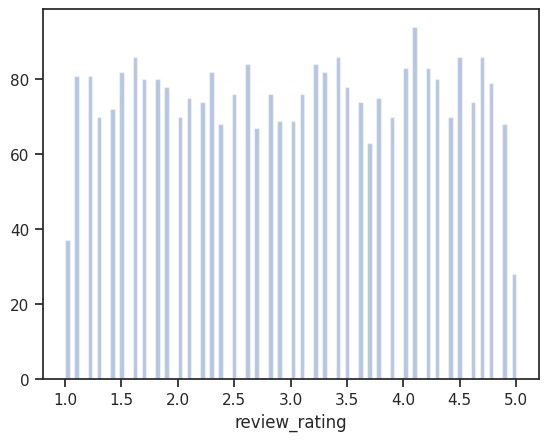

In [39]:
#Graficamos nuestros datos en una grafica de barras
sns.set(style="ticks")
sns.distplot(df['review_rating'], kde=False, norm_hist=False, bins=100)

Como ya lo mencionamos en el análisis de nuestra tabla de frecuencias, y aquí podemos confirmarlo graficamente que nuestros datos tienen una distribución uniforme.
Llama mucho la atención que todos los valores en 0, no tienen decimales,  por eso nuestra barra es muy elevada.

In [40]:
#Obtenemos la curtosis y la asimetria de nuestra variable
print('Curtosis: ', kurtosis(df['review_rating']))
print('Asimetría: ', skew(df['review_rating']))

Curtosis:  -1.2187607664271782
Asimetría:  -0.015312566106007681


### Gráfica de densidad

 Realizamos grafica de densidad para relacionar las variables review_rating con payment_method, payment_method es una variable categorica del método de pago (efectivo o con tarjeta) asociamos ambas variables para ver la relacion del tipo de pago con la calificación

In [41]:
#Obteenmos nuestras agrupaciones por pago en efectivo y pago en tarjeta
by_Cash = df[df['payment_method']=='Cash']
by_Credit = df[df['payment_method']=='Credit Card']
by_Cash

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
6,4055,Jacket,2571.0,2023-07-08,1.3,Cash
7,3973,Trousers,2419.0,2022-11-10,4.6,Cash
...,...,...,...,...,...,...
3393,4110,Polo Shirt,42.0,2022-10-15,4.0,Cash
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


<ipython-input-42-c351a636be46>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(by_Cash['review_rating'], hist=False, kde_kws={'shade':True}, label='Cash')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-42-c351a636be46>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fu

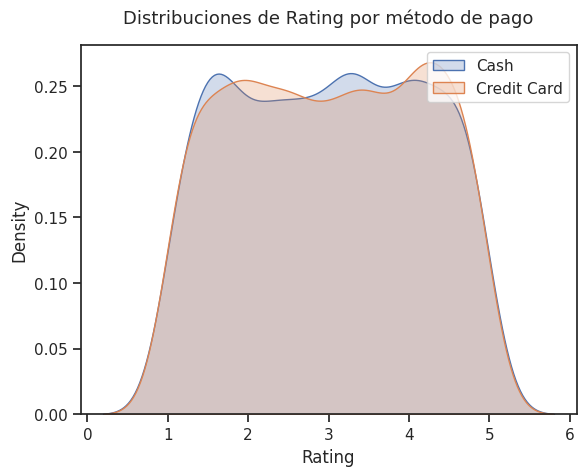

In [42]:
#Graficamos nuestras variables
ax = sns.distplot(by_Cash['review_rating'], hist=False, kde_kws={'shade':True}, label='Cash')
sns.distplot(by_Credit['review_rating'], hist=False, kde_kws={'shade':True}, ax=ax, label='Credit Card')
ax.set_title('Distribuciones de Rating por método de pago', fontsize=13, pad=15)
ax.set(xlabel='Rating')
ax.legend(loc='upper right')

Al observar nuestros datos graficados podemos ver una muy cercana similitud en los métodos de pago en relación al rating de la calificación, entonces podríamos deducir que ambos son muy solicitados.

### **EXPLORACIÓN DE VARIABLES CATEGÓRICAS**

In [43]:
df

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,0.0,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash


En nuestro dataset contamos con dos posibles variables categóricas, que es item_purchased y payment_method. Comenzaremos analizando item_purchased

In [44]:
#Obtenemos los tipos de productos
items = df['item_purchased'].unique()

In [45]:
df1 = df['review_rating'].groupby(intervalos_rev).count()
df1

review_rating
(0.996, 1.8]    669
(1.8, 2.6]      607
(2.6, 3.4]      609
(3.4, 4.2]      620
(4.2, 5.0]      571
Name: review_rating, dtype: int64

In [46]:
#Obtenemos la cantidad de productos vendidos por cada uno
items_count = df['item_purchased'].value_counts()

[Text(0, 0.5, 'Conteo')]

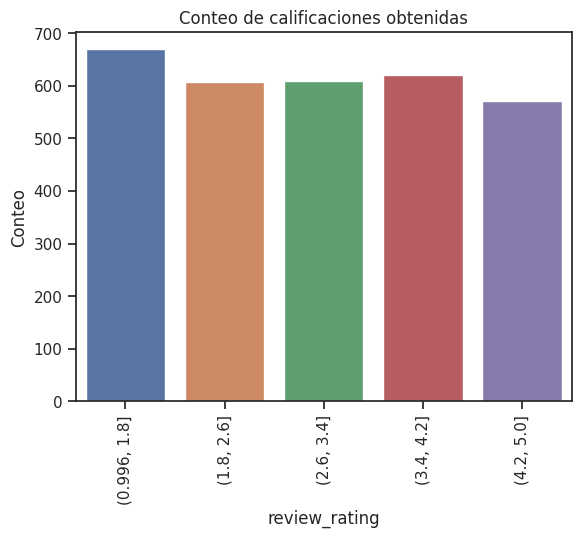

In [47]:
#Graficamos nuestros productos vendidos vs el conteo de cada uno
ax = sns.barplot(x=df1.index, y=df1)
ax.set_title('Conteo de calificaciones obtenidas')
plt.xticks(rotation=90)
ax.set(ylabel='Conteo')

Realizando la gráfica de barras de nuestras variables correspondientes, lo que podemos observar es que tenemos un mayor de datos en calificaciones que son un poco bajas, pero el segundo intervalo donde hay más datos es uno de los más altos, todos son muy proporcionados, pero en esta encuesta lo ideal es que hubiera minoría de datos en los primeros intervalos. Sin embargo esto puede servir como referencia para la mejora de la tienda.

[Text(0, 0.5, 'Conteo')]

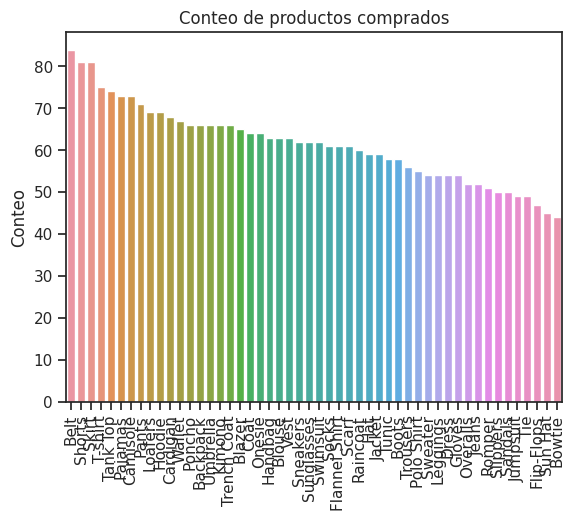

In [48]:
#Graficamos nuestros productos vendidos vs el conteo de cada uno
ax = sns.barplot(x=items_count.index, y=items_count)
ax.set_title('Conteo de productos comprados')
plt.xticks(rotation=90)
ax.set(ylabel='Conteo')

Decidimos realizar una grafica de barras para saber cómo están distribuidas las ventas de acuerdo al producto.

Realizamos el mismo procedimiento para nuestra variable payment_method

In [49]:
#Obtenemos los tipos de metodos de pago
pago = df['payment_method'].unique()
pago

array(['Credit Card', 'Cash'], dtype=object)

In [50]:
#Obtenemos la cantidad de ventas por cada método de pago
pago_count = df['payment_method'].value_counts()
pago_count

Credit Card    1594
Cash           1482
Name: payment_method, dtype: int64

[Text(0, 0.5, 'Conteo')]

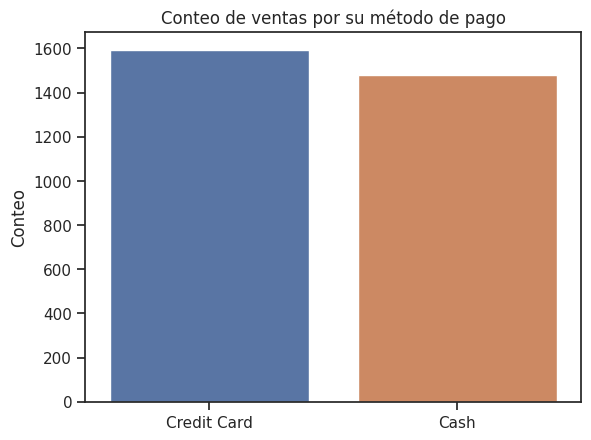

In [51]:
#Graficamos nuestros productos vendidos vs el conteo de cada uno
ax = sns.barplot(x=pago_count.index, y=pago_count)
ax.set_title('Conteo de ventas por su método de pago')
ax.set(ylabel='Conteo')

Graficamente se visualiza cuál es el método de pago que más se utilizó, en esta ocasción, aunque los resultados son muy parejos, el más usado es mediante tarjeta de credito.

TABLAS DE CONTINGENCIA

In [52]:
#se agrega una columna a nuestro DF para poder agrupar por intervalo de calificacion
df2 = df
df2['interval_rating'] = pd.cut(df2['review_rating'], bins=5)
df2

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method,interval_rating
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,"(1.8, 2.6]"
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,"(3.4, 4.2]"
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,"(2.6, 3.4]"
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,"(4.2, 5.0]"
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,"(4.2, 5.0]"
...,...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash,"(2.6, 3.4]"
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash,"(1.8, 2.6]"
3397,3991,Onesie,0.0,2022-10-03,2.4,Credit Card,"(1.8, 2.6]"
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash,"(0.996, 1.8]"


In [53]:
#Agrupamos nuestros items por la calificacion adquirida
by_item_review = df2.groupby('interval_rating')[['item_purchased']].count()
by_item_review

,item_purchased
interval_rating,
"(0.996, 1.8]",669
"(1.8, 2.6]",607
"(2.6, 3.4]",609
"(3.4, 4.2]",620
"(4.2, 5.0]",571


In [54]:
#Se hace tabla de contingencia para agrupar por item y calificacion
crosstab_review_item = pd.crosstab( df2['interval_rating'], df2['item_purchased'])
crosstab_review_item

item_purchased,Backpack,Belt,Blazer,Blouse,Boots,Bowtie,Camisole,Cardigan,Coat,Dress,...,Swimsuit,T-shirt,Tank Top,Tie,Trench Coat,Trousers,Tunic,Umbrella,Vest,Wallet
interval_rating,,,,,,,,,,,,,,,,,,,,,
"(0.996, 1.8]",15,21,15,16,12,11,25,13,13,8,...,8,15,10,9,16,14,24,11,16,8
"(1.8, 2.6]",11,12,11,12,8,7,15,13,11,13,...,18,17,14,8,5,13,13,13,9,18
"(2.6, 3.4]",15,18,13,12,10,10,13,14,11,17,...,12,13,18,13,15,12,7,15,16,14
"(3.4, 4.2]",12,18,17,12,9,8,11,15,15,7,...,10,20,16,13,17,7,8,15,12,12
"(4.2, 5.0]",13,15,9,11,19,8,9,13,14,9,...,14,10,16,6,13,10,6,12,10,15


En este caso decidimos realizar una tabla de contingencia para agrupar los datos del tipo de producto y cuántas unidades de ese producto fueron clasificadas en los intervalos de calificacion.

In [55]:
import numpy as np

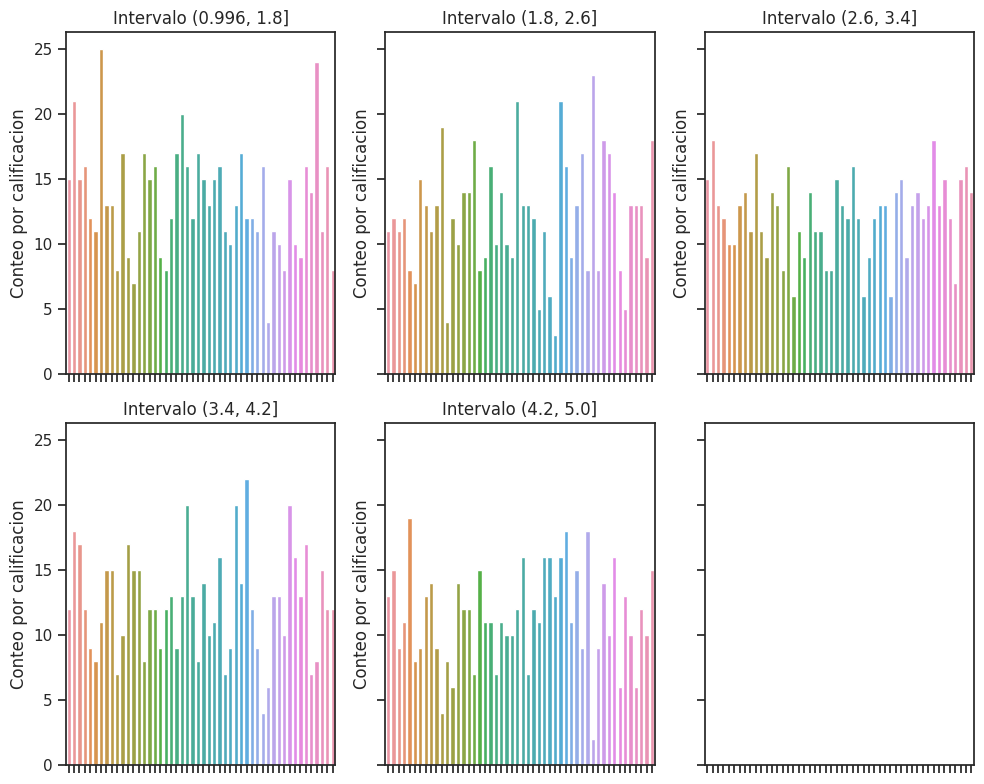

In [56]:
#Se hace una comparativa de graficas de barras para saber qué tantos productos fueron adquiridos
#de acuerdo con la calificacion
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab_review_item.columns, y=crosstab_review_item.loc[1], ax=axes[0,0])
sns.barplot(x=crosstab_review_item.columns, y=crosstab_review_item.loc[2], ax=axes[0,1])
sns.barplot(x=crosstab_review_item.columns, y=crosstab_review_item.loc[3], ax=axes[0,2])
sns.barplot(x=crosstab_review_item.columns, y=crosstab_review_item.loc[4], ax=axes[1,0])
sns.barplot(x=crosstab_review_item.columns, y=crosstab_review_item.loc[5], ax=axes[1,1])

axes[0,0].set(xlabel='', ylabel='Conteo por calificacion', title='Intervalo (0.996, 1.8]')
axes[0,1].set(xlabel='', ylabel='Conteo por calificacion', title='Intervalo (1.8, 2.6]')
axes[0,2].set(xlabel='', ylabel='Conteo por calificacion', title='Intervalo (2.6, 3.4]')
axes[1,0].set(xlabel='', ylabel='Conteo por calificacion', title='Intervalo (3.4, 4.2]')
axes[1,1].set(xlabel='', ylabel='Conteo por calificacion', title='Intervalo (4.2, 5.0]')

for ax in axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()

Realizamos una figura con una grafica con cada intervalo de las calificaciones obtenenidas, por cada tipo de producto que es vendido

<Axes: xlabel='payment_method', ylabel='purchase_amount'>

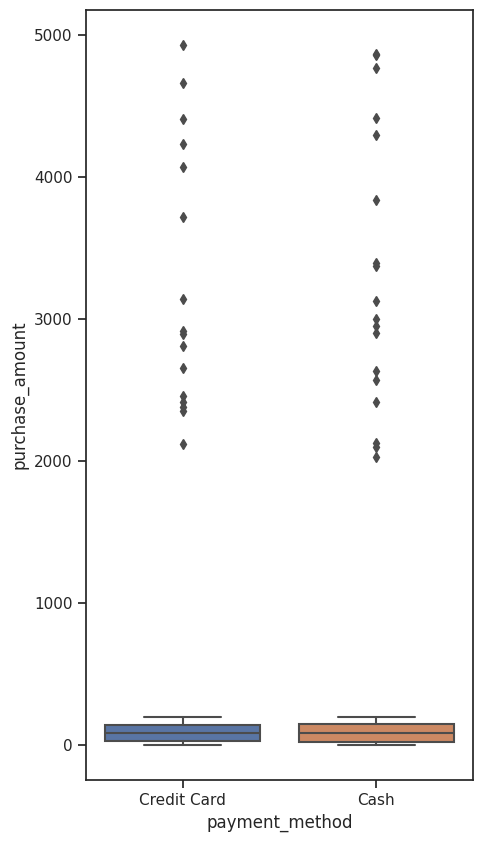

In [57]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df2, x='payment_method', y='purchase_amount')

Analizando los resultados obtenidos podemos ver gráficamente que nuestros datos están conecntrados en compras menores a 1000 USD y ambas están distribuidas proporcionalmente en las dos opciones de pago.

También es posible observar algunos datos atípicos en lo que se categorizaría como precios altos.

<Axes: xlabel='payment_method', ylabel='purchase_amount'>

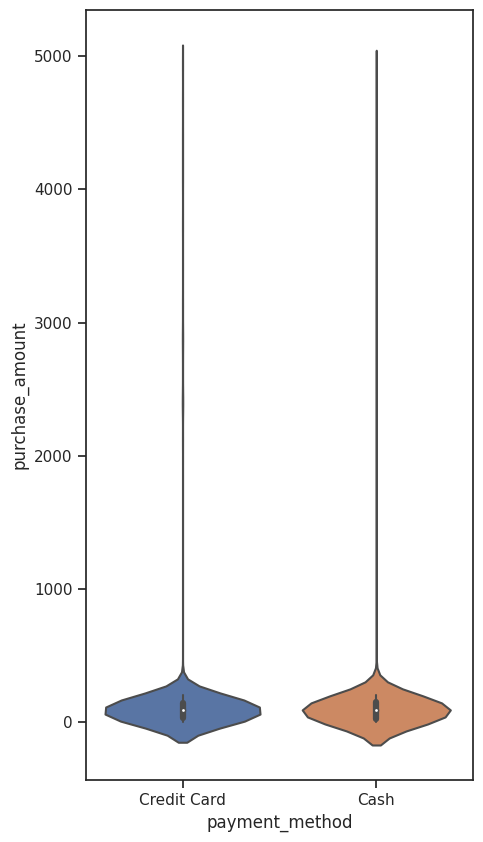

In [58]:
plt.figure(figsize=(5,10))
sns.violinplot(data=df2, x='payment_method', y='purchase_amount')

MATRIZ CORRELACIONES

In [59]:
df_corr = df2[['purchase_amount', 'review_rating']]
df_corr.corr()

,purchase_amount,review_rating
purchase_amount,1.000000,0.036044
review_rating,0.036044,1.000000


In [60]:
df_corr.isna().sum()

purchase_amount    0
review_rating      0
dtype: int64

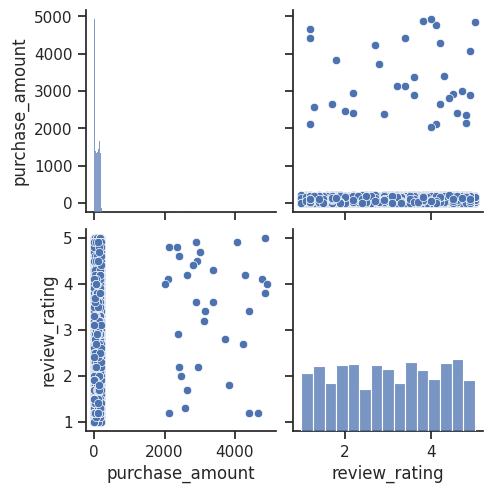

In [61]:
sns.pairplot(df_corr)

Se intentó limpiar el dataset para intentar obtener mejores resultads en cuanto a correlación, sin embargo estos no fueron buenos, así que solo se optó por liminar las calificaciones nulas del dataset.

ENTRENAMIENTO REGRESION LINEAL COMO PRACTICA

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(df_corr['purchase_amount'].to_frame(), df_corr['review_rating'])

LinearRegression()

In [64]:
y_predict = lr.predict(df_corr['purchase_amount'].to_frame())

<Axes: xlabel='purchase_amount', ylabel='review_rating'>

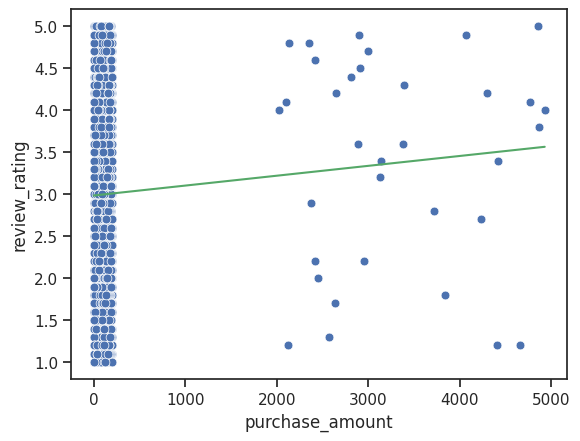

In [65]:
sns.scatterplot(x=df_corr['purchase_amount'], y=df_corr['review_rating'], s=40)
sns.lineplot(x=df_corr['purchase_amount'], y=y_predict, color='g')

Al realizar el anterior ejercicio, podemos darnos cuenta que sería muy complicado predecir alguna de nuestras dos variables numéricas en base a la otra, entonces no sería un método efectivo en este caso.

## **BOOTSTRAP**

Teniendo en cuenta que nuestro conjunto de datos cuenta con dos variables numéricas, se obtienen la media y la mediana de cada una respectivamente.

In [66]:
df_boot = df
df_boot.head()

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method,interval_rating
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,"(1.8, 2.6]"
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,"(3.4, 4.2]"
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,"(2.6, 3.4]"
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,"(4.2, 5.0]"
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,"(4.2, 5.0]"


### **Variable purchase_amount**

**Media**

Se decide hacer un bootstrapping con muestras del 90% de los datos, ya que los resultados son los más próximos a una distrución normal.

In [67]:
#Bootstrapping con muestras del 90%
amount = df_boot['purchase_amount']

means_amount = []

for i in range(100_000):
  sample_amount = amount.sample(n=int((amount.count() * 90 / 100)), replace=True)
  means_amount.append(sample_amount.mean())

serie_means_amount = pd.Series(means_amount)

<ipython-input-68-f226c7556693>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means_amount, kde=False, norm_hist=False)


<Axes: >

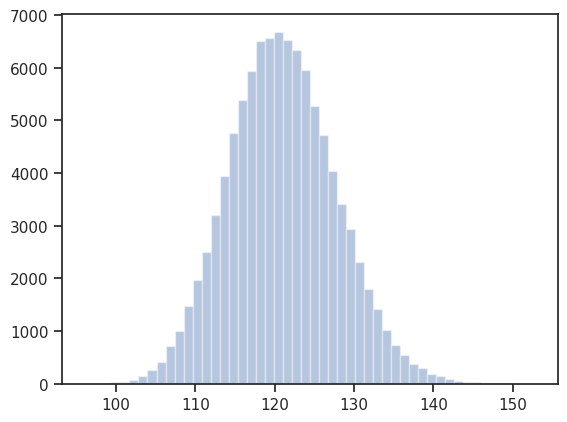

In [68]:
sns.distplot(serie_means_amount, kde=False, norm_hist=False)

In [69]:
serie_means_amount.skew()

0.18476749396800618

In [70]:
serie_means_amount.kurtosis()

0.03561239581532227

a) ERROR ESTÁNDAR

In [71]:
print('Error estándar: ', serie_means_amount.std())

Error estándar:  6.753976724133718


In [72]:
print('Valor minimo: ', serie_means_amount.min())
print('Valor Maximo: ', serie_means_amount.max())
print('Rango: ', serie_means_amount.max()-serie_means_amount.min())

Valor minimo:  96.02601156069365
Valor Maximo:  152.84212427745663
Rango:  56.81611271676299


<Axes: >

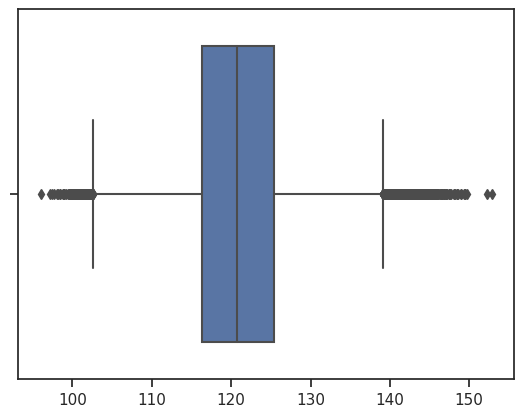

In [73]:
sns.boxplot(x=serie_means_amount)

b) INTERVALO DE CONFIANZA

Intervalo de confinza del 95%

In [74]:
lim_inf_amount_mean = serie_means_amount.quantile(0.025)
lim_sup_amount_mean = serie_means_amount.quantile(0.975)

In [75]:
print(f'Intervalo de 95% de confianza de la media: {lim_inf_amount_mean} < {amount.mean()} > {lim_sup_amount_mean}')

Intervalo de 95% de confianza de la media: 108.30597001445086 < 120.96228868660599 > 134.6875


In [76]:
mean_of_intervals1 = ((amount.mean() - lim_inf_amount_mean) + (lim_sup_amount_mean - amount.mean()))/2
print(f'Intervalo de 95% confianza de la media: {amount.mean()} +/- {mean_of_intervals1}')

Intervalo de 95% confianza de la media: 120.96228868660599 +/- 13.190764992774568


<ipython-input-77-f8c092622453>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means_amount, kde=False, norm_hist=False)


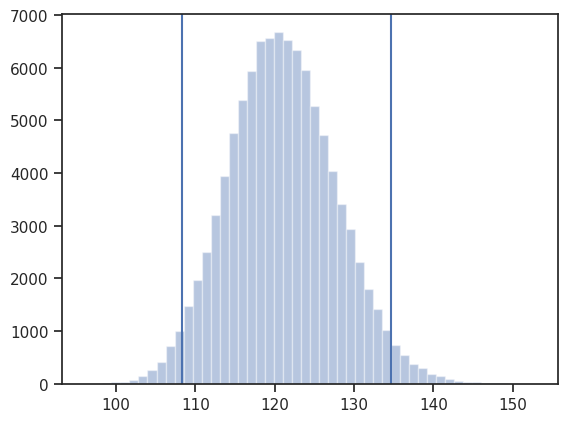

In [77]:
sns.distplot(serie_means_amount, kde=False, norm_hist=False)
plt.axvline(lim_inf_amount_mean)
plt.axvline(lim_sup_amount_mean)

**Mediana**

In [78]:
#Bootstrapping con muestras del 90%
amount = df_boot['purchase_amount']

median_amount = []

for i in range(100_000):
  sample_amount = amount.sample(n=int((amount.count() * 90 / 100)), replace=True)
  median_amount.append(sample_amount.median())

serie_median_amount = pd.Series(median_amount)

<ipython-input-79-96dc281b90d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_median_amount, kde=False, norm_hist=False)


<Axes: >

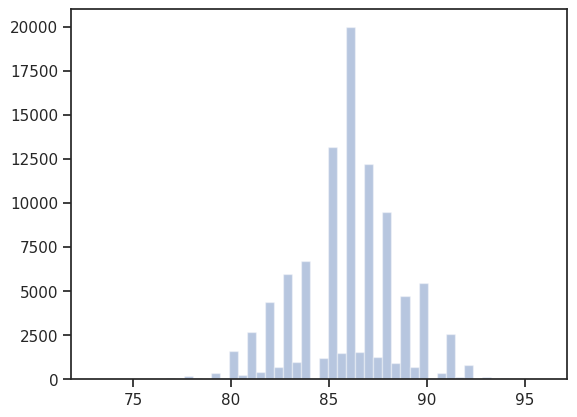

In [79]:
sns.distplot(serie_median_amount, kde=False, norm_hist=False)

In [80]:
serie_median_amount.skew()

-0.1698211581097283

In [81]:
serie_median_amount.kurtosis()

0.08606229375806285

a) ERROR ESTÁNDAR

In [82]:
print('Error estándar: ', serie_median_amount.std())

Error estándar:  2.574501272959104


In [83]:
print('Valor minimo: ', serie_median_amount.min())
print('Valor Maximo: ', serie_median_amount.max())
print('Rango: ', serie_median_amount.max() - serie_median_amount.min())

Valor minimo:  73.0
Valor Maximo:  96.0
Rango:  23.0


<Axes: >

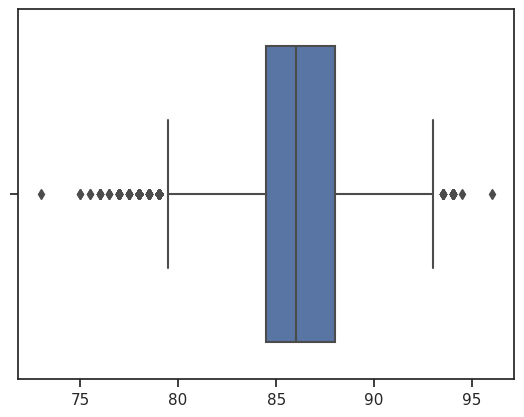

In [84]:
sns.boxplot(x=serie_median_amount)

b) INTERVALO DE CONFIANZA

Intervalo de confinza del 95%

In [85]:
lim_inf_amount_median = serie_median_amount.quantile(0.025)
lim_sup_amount_median = serie_median_amount.quantile(0.975)

In [86]:
print(f'Intervalo de 95% de confianza de la mediana: {lim_inf_amount_median} < {amount.median()} > {lim_sup_amount_median}')

Intervalo de 95% de confianza de la mediana: 81.0 < 86.0 > 91.0


In [87]:
mean_of_intervals2 = ((amount.median() - lim_inf_amount_median) + (lim_sup_amount_median - amount.median()))/2
print(f'Intervalo de 95% confianza de la mediana: {amount.median()} +/- {mean_of_intervals2}')

Intervalo de 95% confianza de la mediana: 86.0 +/- 5.0


<ipython-input-88-094de25bac1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_median_amount, kde=False, norm_hist=False)


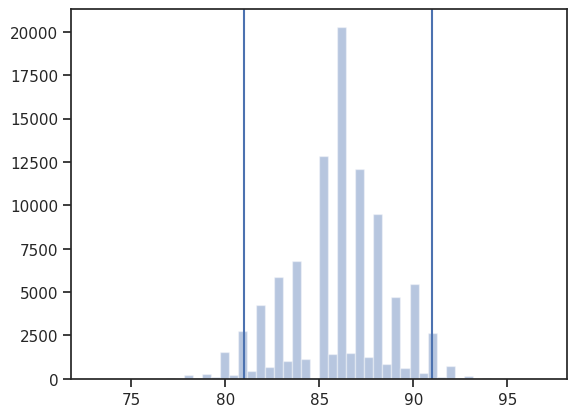

In [88]:
sns.distplot(serie_median_amount, kde=False, norm_hist=False)
plt.axvline(lim_inf_amount_median)
plt.axvline(lim_sup_amount_median)

### **Variable review_rating**

In [88]:
#Bootstrapping con muestras del 90%
review= df_boot['review_rating']

means_review = []

for i in range(100_000):
  sample_review = review.sample(n=int((review.count() * 90 / 100)), replace=True)
  means_review.append(sample_review.mean())

serie_means_review = pd.Series(means_review)

<ipython-input-89-18572101a501>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means_review, kde=False, norm_hist=False)


<Axes: >

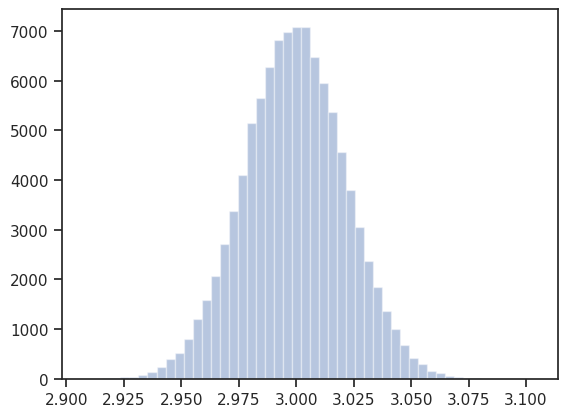

In [89]:
sns.distplot(serie_means_review, kde=False, norm_hist=False)

In [90]:
serie_means_review.skew()

-0.004779092897925442

In [91]:
serie_means_review.kurtosis()

-0.017697257770898478

a) ERROR ESTÁNDAR

In [92]:
print('Error estándar: ', serie_means_review.std())

Error estándar:  0.022024822788169123


In [93]:
print('Valor minimo: ', serie_means_review.min())
print('Valor Maximo: ', serie_means_review.max())
print('Rango: ', serie_means_review.max()-serie_means_review.min())

Valor minimo:  2.907803468208092
Valor Maximo:  3.1040462427745665
Rango:  0.19624277456647432


<Axes: >

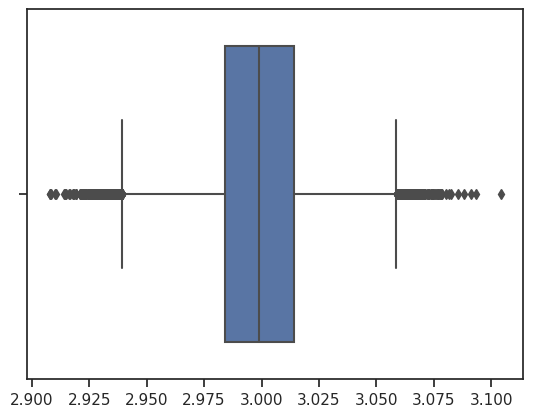

In [94]:
sns.boxplot(x=serie_means_review)

b) INTERVALO DE CONFIANZA

Intervalo de confianza del 95%

In [95]:
lim_inf_review_mean = serie_means_review.quantile(0.025)
lim_sup_review_mean = serie_means_review.quantile(0.975)

In [96]:
print(f'Intervalo de 95% de confianza de la media: {lim_inf_review_mean} < {review.mean()} > {lim_sup_review_mean}')

Intervalo de 95% de confianza de la media: 2.955852601156069 < 2.999057217165149 > 3.042196531791907


In [97]:
mean_of_intervals3 = ((review.mean() - lim_inf_review_mean) + (lim_sup_review_mean - review.mean()))/2
print(f'Intervalo de 95% confianza de la media: {review.mean()} +/- {mean_of_intervals3}')

Intervalo de 95% confianza de la media: 2.999057217165149 +/- 0.043171965317919


<ipython-input-98-986b338b6fbf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means_review, kde=False, norm_hist=False)


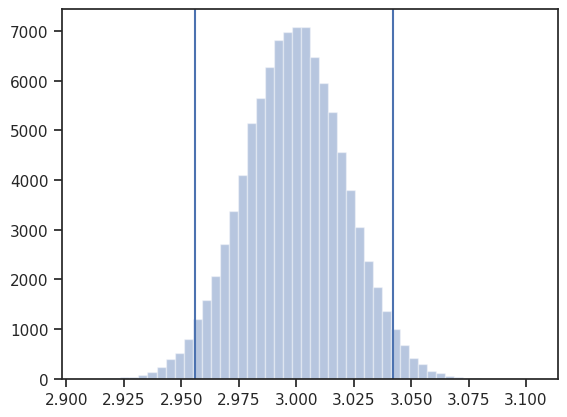

In [98]:
sns.distplot(serie_means_review, kde=False, norm_hist=False)
plt.axvline(lim_inf_review_mean)
plt.axvline(lim_sup_review_mean)

**Mediana**

In [99]:
#Bootstrapping con muestras del 90%
review = df_boot['review_rating']

median_review = []

for i in range(100_000):
  sample_review = review.sample(n=int((review.count() * 90 / 100)), replace=True)
  median_review.append(sample_review.median())

serie_median_review = pd.Series(median_review)

<ipython-input-100-bb0ebde94227>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_median_review, kde=False, norm_hist=False)


<Axes: >

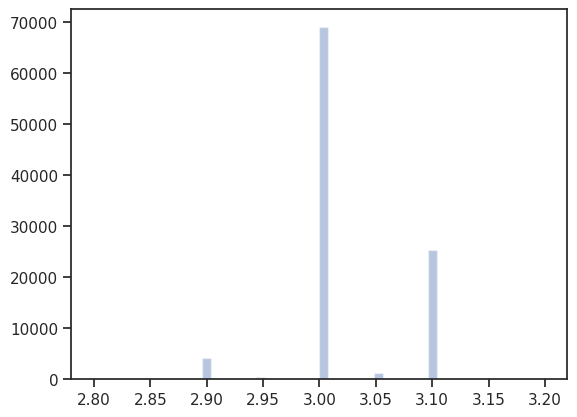

In [100]:
sns.distplot(serie_median_review, kde=False, norm_hist=False)

In [101]:
serie_median_review.skew()

0.32639183294103935

In [102]:
serie_median_review.kurtosis()

0.027211836100108577

a) ERROR ESTÁNDAR

In [103]:
print('Error estándar: ', serie_median_review.std())

Error estándar:  0.05031803967565879


In [104]:
print('Valor minimo: ', serie_median_review.min())
print('Valor Maximo: ', serie_median_review.max())
print('Rango: ', serie_median_review.max()-serie_median_review.min())

Valor minimo:  2.8
Valor Maximo:  3.2
Rango:  0.40000000000000036


<Axes: >

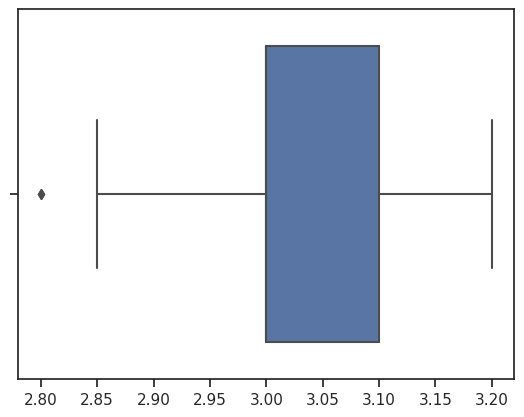

In [105]:
sns.boxplot(x=serie_median_review)

b) INTERVALO DE CONFIANZA

Intervalo de confinza del 95%

In [106]:
lim_inf_review_median = serie_median_review.quantile(0.025)
lim_sup_review_median = serie_median_review.quantile(0.975)

In [107]:
print(f'Intervalo de 95% de confianza de la media: {lim_inf_review_median} < {review.median()} > {lim_sup_review_median}')

Intervalo de 95% de confianza de la media: 2.9 < 3.0 > 3.1


In [108]:
mean_of_intervals4 = ((review.median() - lim_inf_review_median) + (lim_sup_review_median - review.median()))/2
print(f'Intervalo de 95% confianza de la media: {review.median()} +/- {mean_of_intervals4}')

Intervalo de 95% confianza de la media: 3.0 +/- 0.10000000000000009


<ipython-input-109-db54c3527053>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_median_review, kde=False, norm_hist=False)


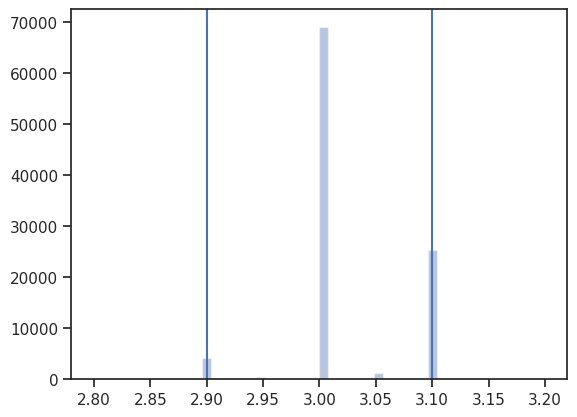

In [109]:
sns.distplot(serie_median_review, kde=False, norm_hist=False)
plt.axvline(lim_inf_review_median)
plt.axvline(lim_sup_review_median)

En este caso no tiene sentido realizar un entrenamiento o una validación cruzada, pues solamente tenemos dos variables numéricas, las cuales son insuficientes para llevar a cabo dichos modelos.

## **TREEMAP**

In [110]:
import plotly.express as px

In [111]:
df_treemap = df
df_treemap.head()

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method,interval_rating
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,"(1.8, 2.6]"
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,"(3.4, 4.2]"
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,"(2.6, 3.4]"
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,"(4.2, 5.0]"
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,"(4.2, 5.0]"


In [112]:
df_treemap['count']=1
df_treemap.head()

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method,interval_rating,count
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,"(1.8, 2.6]",1
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,"(3.4, 4.2]",1
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,"(2.6, 3.4]",1
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,"(4.2, 5.0]",1
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,"(4.2, 5.0]",1


In [113]:
df.head()

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method,interval_rating,count
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,"(1.8, 2.6]",1
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,"(3.4, 4.2]",1
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,"(2.6, 3.4]",1
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,"(4.2, 5.0]",1
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,"(4.2, 5.0]",1


In [114]:
fig_treemap = px.treemap(df_treemap, path=['item_purchased', 'payment_method'], values='count')
fig_treemap.show()

Se opta por hacer un treemap, que este categorizado por el tipo de producto obtenido y a su vez, sus hijos son la proporción de los métodos de pago con los que fueron adquiridos

### **GRAFICA DE BARRAS APILADA**

In [115]:
df_barras = df
df_barras.head()

,customer_reference_id,item_purchased,purchase_amount,date_purchase,review_rating,payment_method,interval_rating,count
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,"(1.8, 2.6]",1
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,"(3.4, 4.2]",1
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,"(2.6, 3.4]",1
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,"(4.2, 5.0]",1
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,"(4.2, 5.0]",1


In [116]:
group_item = df_barras.groupby(['item_purchased', 'payment_method'])['count'].sum()
group_item

item_purchased  payment_method
Backpack        Cash              34
                Credit Card       32
Belt            Cash              32
                Credit Card       52
Blazer          Cash              31
                                  ..
Umbrella        Credit Card       33
Vest            Cash              34
                Credit Card       29
Wallet          Cash              29
                Credit Card       38
Name: count, Length: 100, dtype: int64

In [117]:
item_values = group_item.unstack(1)
item_values

payment_method,Cash,Credit Card
item_purchased,,
Backpack,34,32
Belt,32,52
Blazer,31,34
Blouse,30,33
Boots,27,31
Bowtie,20,24
Camisole,39,34
Cardigan,30,38
Coat,26,38


<ipython-input-118-f7077f8e68a7>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



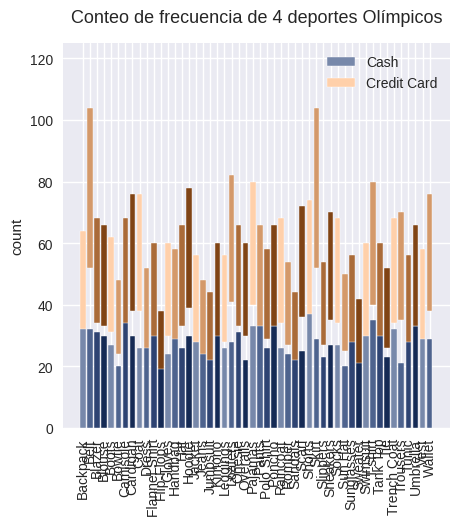

In [118]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(item_values.index, item_values['Cash'], label='Cash',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(item_values.index, item_values['Credit Card'], bottom=item_values['Credit Card'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de 4 deportes Olímpicos', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Cash', 'Credit Card'));
plt.xticks(rotation=90)
ax.set_ylim(0, 125);

De igual forma, para ejemplificar este tipo de gráfico, se hace una categorización por le tipo de producto apilando los metodos de pago para cada uno.

## **NLP**

Fuente: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp


Para abarcar el tema de procesamiento de lenguaje natural, se usa un dataset especifico. Este dataset clasifica un fragmento de texto y está clasificado en cuál es la emocion que lo representa.

In [119]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [120]:
nlp = pd.read_csv('/content/drive/MyDrive/DataSetsAny/val.txt', sep=';')
nlp.columns = ["Text", "Emotions"]
nlp.head()

,Text,Emotions
0,i feel like i am still looking at a blank canv...,sadness
1,i feel like a faithful servant,love
2,i am just feeling cranky and blue,anger
3,i can have for a treat or if i am feeling festive,joy
4,i start to feel more appreciative of what god ...,joy


In [121]:
nlp.shape

(1999, 2)

In [122]:
nlp['Emotions'].unique()

array(['sadness', 'love', 'anger', 'joy', 'fear', 'surprise'],
      dtype=object)

In [123]:
text = nlp['Text']
text

0       i feel like i am still looking at a blank canv...
1                          i feel like a faithful servant
2                       i am just feeling cranky and blue
3       i can have for a treat or if i am feeling festive
4       i start to feel more appreciative of what god ...
                              ...                        
1994    im having ssa examination tomorrow in the morn...
1995    i constantly worry about their fight against n...
1996    i feel its important to share this info for th...
1997    i truly feel that if you are passionate enough...
1998    i feel like i just wanna buy any cute make up ...
Name: Text, Length: 1999, dtype: object

In [124]:
#Limpiamos nuestra columna text
text = text.str.lower()
text = text.str.strip()
text = text.str.replace('[^\w\s]', '')
text = text.str.replace('http', '')
text = text.str.replace('href', '')
text = text.str.replace('www', '')
text = text.str.replace('\d', '')
text = text.str.replace('\\n', '')
text = text.dropna()

text

<ipython-input-124-970f8d90fd99>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-124-970f8d90fd99>:8: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-124-970f8d90fd99>:9: FutureWarning:

The default value of regex will change from True to False in a future version.



0       i feel like i am still looking at a blank canv...
1                          i feel like a faithful servant
2                       i am just feeling cranky and blue
3       i can have for a treat or if i am feeling festive
4       i start to feel more appreciative of what god ...
                              ...                        
1994    im having ssa examination tomorrow in the morn...
1995    i constantly worry about their fight against n...
1996    i feel its important to share this info for th...
1997    i truly feel that if you are passionate enough...
1998    i feel like i just wanna buy any cute make up ...
Name: Text, Length: 1999, dtype: object

In [125]:
#separamos cada oracion en palabras
tokenized = text.apply(nltk.word_tokenize)
tokenized

0       [i, feel, like, i, am, still, looking, at, a, ...
1                   [i, feel, like, a, faithful, servant]
2               [i, am, just, feeling, cranky, and, blue]
3       [i, can, have, for, a, treat, or, if, i, am, f...
4       [i, start, to, feel, more, appreciative, of, w...
                              ...                        
1994    [im, having, ssa, examination, tomorrow, in, t...
1995    [i, constantly, worry, about, their, fight, ag...
1996    [i, feel, its, important, to, share, this, inf...
1997    [i, truly, feel, that, if, you, are, passionat...
1998    [i, feel, like, i, just, wan, na, buy, any, cu...
Name: Text, Length: 1999, dtype: object

In [126]:
all_words = tokenized.sum()
all_text = nltk.Text(all_words)
all_text

<Text: i feel like i am still looking at...>

Debido a que es un analisis de texto que esta enfocado en los sentimientos, decidimos enfocar nuestro analisis en la palabra 'feel'

In [127]:
all_text.concordance('feel', lines=20)

Displaying 20 of 1361 matches:
i feel like i am still looking at a blank c
blank canvas blank pieces of paper i feel like a faithful servant i am just fe
r if i am feeling festive i start to feel more appreciative of what god has do
 be able to take care of this baby i feel incredibly lucky just to be able to 
cky just to be able to talk to her i feel less keen about the army every day i
less keen about the army every day i feel dirty and ashamed for saying that i 
 dirty and ashamed for saying that i feel bitchy but not defeated yet i was dr
ess the slaughter of others i didn t feel abused and quite honestly it made my
e i also loved that you could really feel the desperation in these sequences a
ust know to begin with i am going to feel shy about it i feel try to tell me i
th i am going to feel shy about it i feel try to tell me im ungrateful tell me
worst daughter sister in the world i feel that it is something that will never
will never really be resolved i just feel like all my ef

In [128]:
# similar: regresa las palabras que aparecen en contextos similares al argumento
all_text.similar('feel')

am have know was do feeling want say think get love be had m see guess
felt find got did


Podemos observar que tiene busca palabras similares a feel que es un verbo, por eso nos muestra más verbos.

In [129]:
#Total de palabras
len(all_text)

37683

In [130]:
#Total de palabras distintas
len(set(all_text))

4791

In [131]:
#riqueza lexica
len(set(all_text)) / len(all_text)

0.12713955895231271

In [132]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [133]:
#colocaciones
all_text.collocations()

feel like; feeling pretty; dont know; someone else; even though; feels
like; last night; two weeks; always feel; sections devoted; sore
throat; little apprehensive; still feel; didnt feel; feeling quite;
prince charming; left feeling; feel pretty; african americans;
bellmont cabinets


In [134]:
#distribucion de frecuencia de nuestras palabras
freq_dist = nltk.FreqDist(all_words)
print(freq_dist)

<FreqDist with 4791 samples and 37683 outcomes>


In [135]:
freq_dist.most_common(50)

[('i', 3185),
 ('feel', 1361),
 ('and', 1176),
 ('to', 1114),
 ('the', 1013),
 ('a', 782),
 ('feeling', 672),
 ('of', 596),
 ('that', 589),
 ('my', 506),
 ('it', 395),
 ('in', 376),
 ('like', 335),
 ('im', 314),
 ('for', 309),
 ('was', 305),
 ('so', 285),
 ('have', 276),
 ('me', 276),
 ('but', 263),
 ('am', 257),
 ('is', 253),
 ('this', 250),
 ('not', 246),
 ('with', 243),
 ('about', 226),
 ('you', 209),
 ('just', 204),
 ('be', 196),
 ('on', 196),
 ('as', 188),
 ('when', 183),
 ('at', 173),
 ('or', 164),
 ('all', 142),
 ('because', 140),
 ('t', 137),
 ('can', 130),
 ('more', 130),
 ('do', 126),
 ('know', 125),
 ('if', 122),
 ('really', 122),
 ('up', 116),
 ('what', 114),
 ('by', 114),
 ('are', 112),
 ('little', 101),
 ('out', 100),
 ('he', 100)]

Se eliminan las palabras vacías o 'stopwords'

In [136]:
from nltk.corpus import stopwords

In [137]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words ]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [138]:
freq_dist_no_stop_words.most_common(50)

[('feel', 1361),
 ('feeling', 672),
 ('like', 335),
 ('im', 314),
 ('know', 125),
 ('really', 122),
 ('little', 101),
 ('time', 99),
 ('get', 89),
 ('people', 89),
 ('want', 86),
 ('would', 77),
 ('still', 76),
 ('even', 70),
 ('much', 68),
 ('things', 65),
 ('life', 63),
 ('ive', 63),
 ('love', 63),
 ('bit', 63),
 ('think', 63),
 ('something', 62),
 ('one', 59),
 ('going', 58),
 ('day', 57),
 ('dont', 57),
 ('make', 57),
 ('back', 55),
 ('pretty', 53),
 ('good', 52),
 ('need', 50),
 ('could', 47),
 ('feels', 46),
 ('right', 46),
 ('say', 46),
 ('always', 46),
 ('way', 45),
 ('though', 44),
 ('go', 42),
 ('also', 41),
 ('see', 41),
 ('cant', 39),
 ('work', 39),
 ('someone', 38),
 ('quite', 37),
 ('well', 35),
 ('today', 35),
 ('help', 35),
 ('around', 34),
 ('never', 34)]

In [139]:
#Conteo de una palabra y porcentaje de aparicion
print(f'{(100 * freq_dist_no_stop_words["feel"]/len(all_words_except_stop_words)):.3f}%')

7.424%


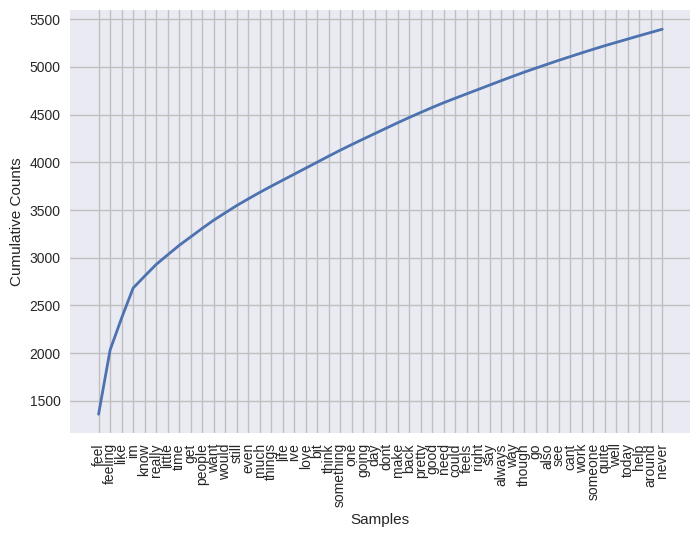

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [140]:
#proporción del texto que está siendo ocupada por las 50 plabras más comúnes
freq_dist_no_stop_words.plot(50, cumulative=True)

In [141]:
#Palabras que solo aparecen una sola vez
freq_dist_no_stop_words.hapaxes()[:20]

['canvas',
 'pieces',
 'servant',
 'army',
 'dribbling',
 'mums',
 'pukey',
 'radiation',
 'stick',
 'rack',
 'stretched',
 'considered',
 'encounter',
 'ruthless',
 'pirates',
 'witness',
 'slaughter',
 'soap',
 'onto',
 'sponge']

In [142]:
unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0         nostalgic
1       intimidated
2           staffed
3           idiotic
4            unread
           ...     
4643        walking
4644          sneer
4645             qa
4646           suck
4647    unprotected
Length: 4648, dtype: object

In [143]:
#Palabras largas
unique_series[unique_series.str.len() > 7]

0         nostalgic
1       intimidated
9       purposeless
14      nonetheless
16        sweetness
           ...     
4617    frustration
4618     threatened
4636       paranoid
4639    oncologists
4647    unprotected
Length: 1520, dtype: object

In [144]:
#Palabras largas que son frecuentes
larger_than_10 = unique_series.str.len() > 7
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 7)

unique_series[larger_than_10 & is_frequent]

0        nostalgic
75        isolated
156       remember
187       thoughts
270      something
           ...    
4416    humiliated
4448      insulted
4454    definitely
4500     convinced
4527      peaceful
Length: 86, dtype: object

In [145]:
#como la frecuencia de longitudes de nuestras palabras
freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])
freq_dist_lengths.most_common()

[(4, 5176),
 (5, 2793),
 (7, 2631),
 (6, 2518),
 (8, 1462),
 (3, 1270),
 (9, 877),
 (10, 621),
 (2, 465),
 (11, 280),
 (12, 137),
 (13, 57),
 (14, 18),
 (1, 16),
 (15, 7),
 (21, 2),
 (16, 1),
 (29, 1)]

In [146]:
#Cuantas palabras tenemos con una longitud de 5
freq_dist_lengths[5]

2793

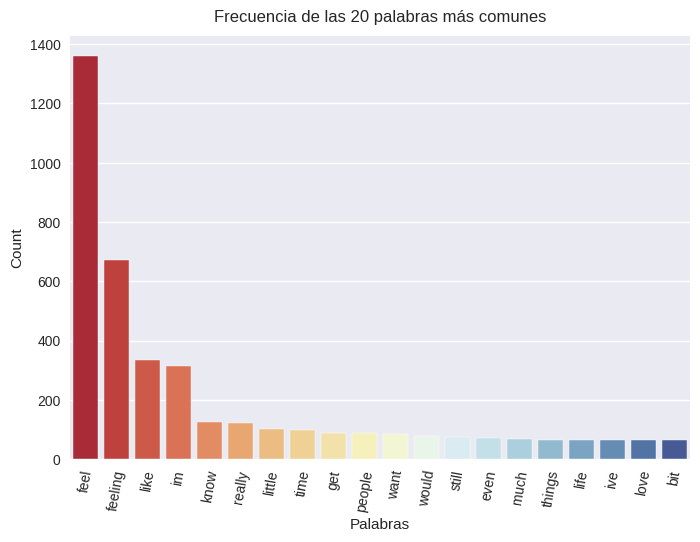

In [147]:
#grafica de la frecuencia de las palabras más comunes
most_common = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

data = {'Palabras':most_common[:, 0], 'Frecuencia': most_common[:, 1]}
dfData = pd.DataFrame(data)
dfData['Frecuencia'] = dfData['Frecuencia'].astype(int)

sns.barplot(x='Palabras', y='Frecuencia', data=dfData, ax=ax, palette='RdYlBu')
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

<ipython-input-148-4e8c1f3cdab4>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




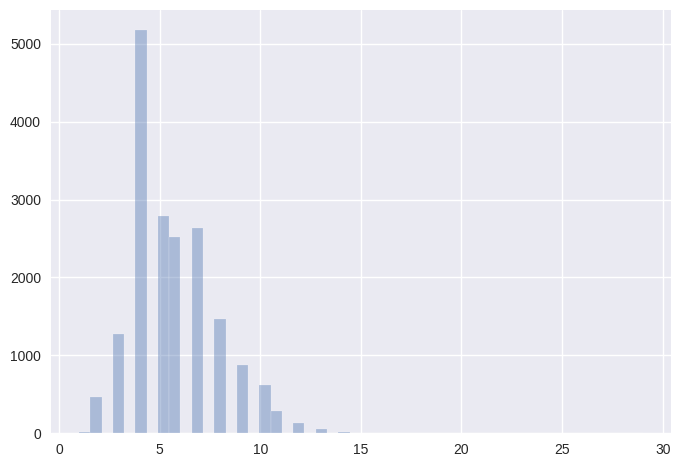

In [148]:
#histograma para visualizar la frecuencia de longitudes de palabras y oraciones
word_lengths = [len(w) for w in all_words_except_stop_words]
sns.distplot(word_lengths, kde=False, norm_hist=False);

In [149]:
from wordcloud import WordCloud

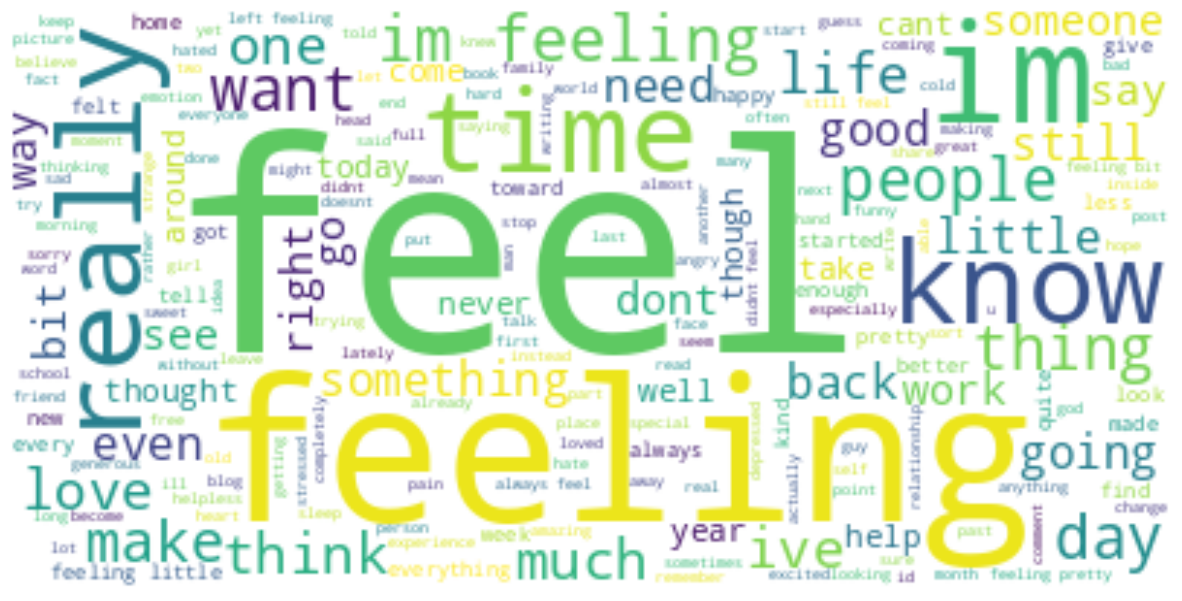

In [150]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Clasificación Supervisada y No Supervisada**

Fuente: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Para efectos de practicar la regresión logística, importamos un dataset más que es acerca de una predicción de un ataque al corazón, evaluando ciertos parametros médicos que influyen en el padecimiento y su categorización.

In [151]:
df_heart = pd.read_csv('/content/drive/MyDrive/DataSetsAny/heart.csv')
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
#Obtenemos dimensiones del dataset
df_heart.shape

(303, 14)

In [153]:
#Verificamos si tenemos valores nulos en nuestras columnas
df_heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [154]:
# Por convencion, decidimos cambiar la estructura del nombre de nuestras columnas
column_name_mapp = {
    'age' : 'age',
    'sex': 'sex',
    'cp' : 'chest_pain_type',
    'trtbps' : 'resting_blood_press',
    'chol' : 'cholestoral',
    'fbs': 'fasting_blood_sugar',
    'restecg' : 'resting_elec_res',
    'thalachh' : 'max_heart_rate',
    'exng' : 'induced_angina',
    'oldpeak': 'oldpeak',
    'slp': 'slp',
    'caa': 'numer_major_vessels',
    'thall': 'thall',
    'output':'target'
}

In [155]:
dfheart_drop = df_heart

In [156]:
#Asignamos los nuevos nombres de nuestras columnas al dataset
df_heart = dfheart_drop
df_heart = dfheart_drop.rename(columns=column_name_mapp)

In [157]:
# Se comprueba que los nombres de las columnas han sido cambiados
df_heart.head()

,age,sex,chest_pain_type,resting_blood_press,cholestoral,fasting_blood_sugar,resting_elec_res,max_heart_rate,induced_angina,oldpeak,slp,numer_major_vessels,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **REGRESION LOGISTICA**

Se realizará la regresión logística para nuestra variable 'target', ya que ésta es binaria y categoriza en 0 y 1 dependiendo de los demás factores, si el paciente tiene la posibilidad de sufrir un atacque al corazón o no

0 -> baja probabilidad de sufrir un ataque

1 -> alta probabilidad de sufrir un ataque

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [159]:
X = df_heart.drop(columns=['target'])
y = df_heart['target']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [161]:
logreg = LogisticRegression(max_iter=10000)

In [162]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [163]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [164]:
logreg.score(X_test, y_test)

0.8571428571428571

### **MATRIZ DE CONFUSION**

In [165]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[32,  4],
       [ 9, 46]])

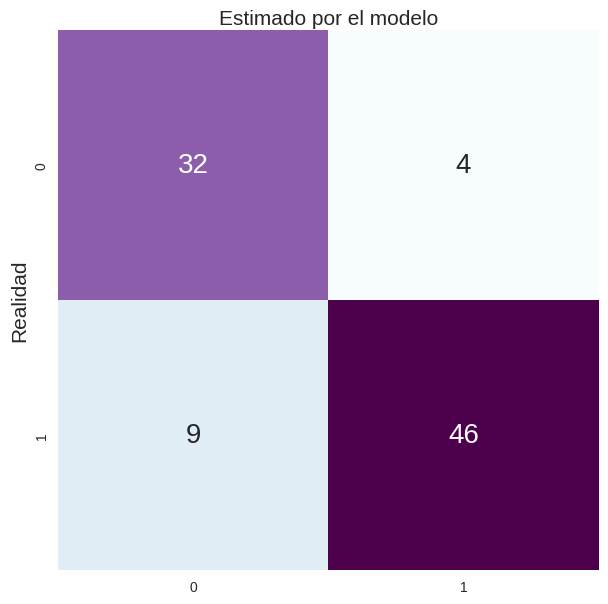

In [166]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [167]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.92
Exactitud: 0.8571428571428571
Sensibilidad: 0.8363636363636363
Especificidad: 0.8888888888888888


### **Curva ROC / AUC**

In [168]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:10,:]

array([[0.50118286, 0.49881714],
       [0.10693859, 0.89306141],
       [0.97029131, 0.02970869],
       [0.11056962, 0.88943038],
       [0.0223331 , 0.9776669 ],
       [0.96235767, 0.03764233],
       [0.33156848, 0.66843152],
       [0.94374051, 0.05625949],
       [0.10274748, 0.89725252],
       [0.65083115, 0.34916885]])

In [169]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

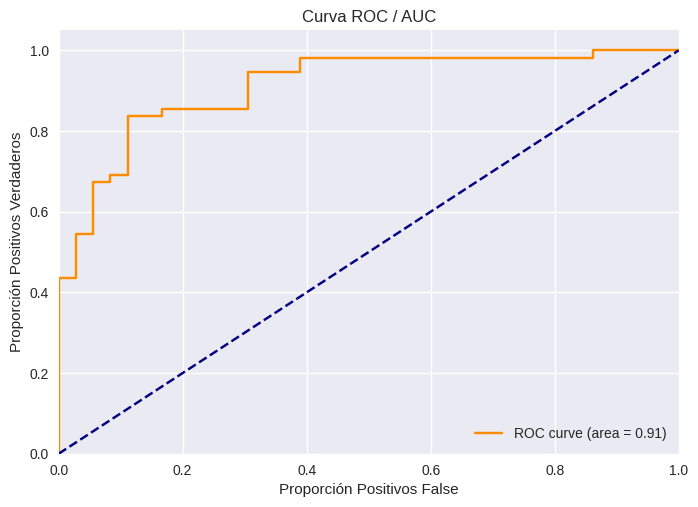

In [170]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()